In [3]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from catalyst.dl import utils

In [1]:
from utils import mask2rle, rle_decode

def get_mask(label_ex,color):
    # Alternative version - use np.where to select a mask 
    lower_red = np.array(color)
    upper_red = np.array(color)

    mask = cv.inRange(label_ex, lower_red, upper_red)
    mask[np.where(mask == 255)[0],np.where(mask==255)[1]] = 1
    return(mask)

def lbl2oneclass(path, img):
    label = utils.imread(path + 'label_train/' + img)
    label = get_mask(label, [0,0,255])
    label_file = os.path.join(path, 'label_build', img)
    cv.imwrite(label_file, label)
def image2tile(path, img,windowx=1120, windowy=1120, stridex=1120, stridey=1120):
    
    image_path = path + 'images/' + img
    label_path = path + 'labels/' + img.split('-')[0] + '-label.png'
    image = cv.imread(image_path)
    label = cv.imread(label_path)
    
    shape = image.shape
    shape = image.shape
    xsize = shape[1]
    ysize = shape[0]
    print(f"converting image {xsize}x{ysize} to tiles ...")
    counter = 0
    for xi in range(0, shape[1], stridex):
        for yi in range(0, shape[0], stridey):

            imagetile = image[yi:yi+windowy, xi:xi+windowx, :]
            labeltile = label[yi:yi+windowy, xi:xi+windowx]
            
            if labeltile is None:
                continue

            image_file = os.path.join(path, 'image_train', img.split('.')[0] + '-' + str(counter).zfill(6) + '.png')
            label_file = os.path.join(path, 'label_train', img.split('.')[0] + '-' + str(counter).zfill(6) + '.png')

            cv.imwrite(image_file, imagetile)
            cv.imwrite(label_file, labeltile)
            counter += 1

/home/jager/anaconda3/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
/home/jager/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/home/jager/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/home/jager/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject



In [3]:
for img in os.listdir('/home/jager/Projects/UAV/dataset-medium/images/'):
    image2tile('/home/jager/Projects/UAV/dataset-medium/', img)

converting image 2866x3440 to tiles ...
converting image 1433x1529 to tiles ...
converting image 3249x2675 to tiles ...
converting image 2102x1911 to tiles ...
converting image 5924x21211 to tiles ...
converting image 5064x8217 to tiles ...
converting image 4204x3822 to tiles ...
converting image 8408x3822 to tiles ...
converting image 6115x7644 to tiles ...
converting image 5351x9364 to tiles ...
converting image 4682x9364 to tiles ...
converting image 19109x1911 to tiles ...
converting image 7262x4968 to tiles ...
converting image 3822x3822 to tiles ...
converting image 4968x4968 to tiles ...
converting image 3822x3249 to tiles ...
converting image 12421x7835 to tiles ...
converting image 4873x4873 to tiles ...
converting image 3344x2102 to tiles ...
converting image 6306x6497 to tiles ...
converting image 5159x4395 to tiles ...
converting image 12039x6688 to tiles ...
converting image 8026x8217 to tiles ...
converting image 12230x13185 to tiles ...
converting image 11752x10415 to ti

In [4]:
for img in os.listdir('/home/jager/Projects/UAV/dataset-medium/test_tif/images'):
    image2tile('/home/jager/Projects/UAV/dataset-medium/test_tif/', img)

converting image 2962x5542 to tiles ...


In [9]:
LABELMAP = {
    'Buildings' : [75,   25, 230], # Buildings
    #'Ground' : [0, 255, 0], # Ground 
    'Trees' : [75,  180,  60], # Trees
    'Water' : [48,  130, 245], # Water
    'Car' : [200, 130,   0] # car
}

INVLABELMAP = {
    '[75, 25, 230]' : 'Buildings', # Buildings
    #'[0, 255, 0]' : 'Ground', # Ground 
    '[75, 180, 60]' : 'Trees', # Trees
    '[48, 130, 245]' : 'Water', # Water
    '[200, 130, 0]' : 'Car' # car
}
    
label_dict = list(LABELMAP.values())

In [10]:
train_ds = pd.DataFrame(columns = ['ImageID','EncodedPixel','Class', 'Shape'])
train_ds

,ImageID,EncodedPixel,Class,Shape


In [5]:
path = 'PATH TO DATASET'

In [12]:
for color in label_dict:
    for image in os.listdir(path + 'label_train/'):
        img = cv.imread(path + 'label_train/' + image)
        shp = img.shape
        mask = get_mask(img,color)
        rle = mask2rle(mask)
        train_ds = train_ds.append({'ImageID': image, 'EncodedPixel':rle, 'Class': color, 'Shape': shp}, ignore_index= True)

In [13]:
train_ds = train_ds.sort_values('ImageID').reset_index().drop(['index'],axis = 1)
train_ds.Class = train_ds.Class.apply(lambda x: INVLABELMAP[str(x)])
train_ds

,ImageID,EncodedPixel,Class,Shape
0,107f24d6e9_F1BE1D4184INSPIRE-ortho-000002.png,,Trees,"(1120, 1120, 3)"
1,107f24d6e9_F1BE1D4184INSPIRE-ortho-000002.png,,Water,"(1120, 1120, 3)"
2,107f24d6e9_F1BE1D4184INSPIRE-ortho-000002.png,,Car,"(1120, 1120, 3)"
3,107f24d6e9_F1BE1D4184INSPIRE-ortho-000002.png,,Buildings,"(1120, 1120, 3)"
4,107f24d6e9_F1BE1D4184INSPIRE-ortho-000003.png,,Buildings,"(1120, 1120, 3)"
...,...,...,...,...
6907,fc5837dcf8_7CD52BE09EINSPIRE-ortho-000017.png,,Buildings,"(1120, 1035, 3)"
6908,fc5837dcf8_7CD52BE09EINSPIRE-ortho-000018.png,,Car,"(1120, 1035, 3)"
6909,fc5837dcf8_7CD52BE09EINSPIRE-ortho-000018.png,,Trees,"(1120, 1035, 3)"
6910,fc5837dcf8_7CD52BE09EINSPIRE-ortho-000018.png,,Water,"(1120, 1035, 3)"


In [14]:
new_empty_list = []
for image in train_ds.ImageID.unique():
    if (list(train_ds[train_ds.ImageID  == image]['EncodedPixel'].values) == ['', '', '', '']):
        new_empty_list.append(image)        

In [15]:
for image in new_empty_list:
    train_ds = train_ds.drop(list(train_ds[train_ds.ImageID  == image].index))

In [17]:
train_ds.to_pickle('_/_/' + 'rle_masks.pcl')

In [18]:
for files in new_empty_list:
    os.replace('___PATHTODATA___/dataset-medium/image_train/' + files, '___PATHTODATA___/dataset-medium/empty_images/' + files)
    os.replace('___PATHTODATA___/dataset-medium/label_train/' + files, '___PATHTODATA___/dataset-medium/empty_labels/' + files)

Text(0.5, 1.0, 'Mask')

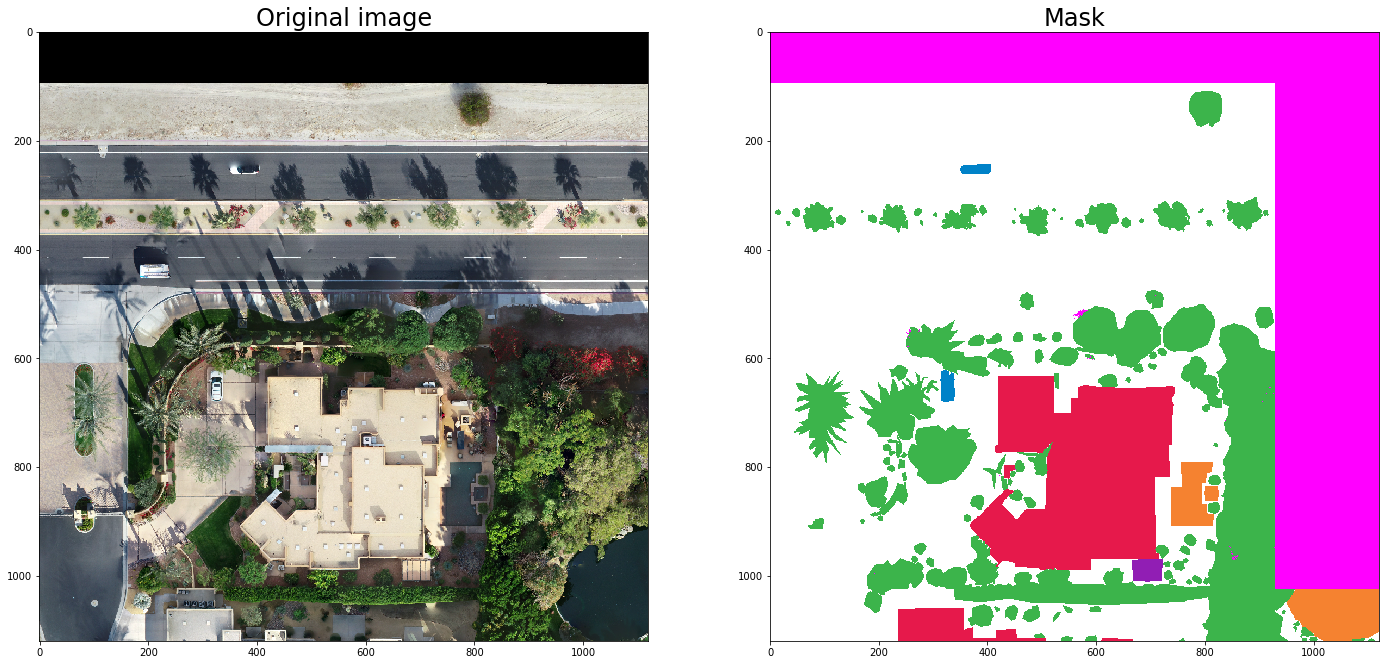

In [7]:
img_1 = utils.imread(os.path.join(path, 'image_train/1d4fbe33f3_F1BE1D4184INSPIRE-ortho-000005.png'))
mask_1 = utils.imread(os.path.join(path, 'label_train/1d4fbe33f3_F1BE1D4184INSPIRE-ortho-000005.png'))

f, ax = plt.subplots(1, 2, figsize=(24, 24))

ax[0].imshow(img_1)
ax[0].set_title('Original image', fontsize=24)
ax[1].imshow(mask_1)
ax[1].set_title('Mask', fontsize=24)